<a href="https://colab.research.google.com/github/DANILO97RAM/Lectura_SEGY/blob/main/Prueba_SEGYIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install segyio

In [ ]:
import segyio
import numpy as np
from shutil import copyfile

filename = 'SEAM_2d_DIP_XX_off_3000_Local_sin_off0.segy'
#filename = 'Modelo_Velocidad_1.segy'
with segyio.open(filename,strict=False) as segyfile:
  #witth Abre el archivo segy

    # Memory map file for faster reading (especially if file is big...)
    segyfile.mmap()

    # Print binary header info
    print('Imprimiendo binario: \n',segyfile.bin)
    print('\nImprimiendo binario por trazas: \n',segyfile.bin[segyio.BinField.Traces])

    # Read headerword inline for trace 10
    print(segyfile.header[10][segyio.TraceField.INLINE_3D])
    print(segyfile.header.items())
    # Print inline and crossline axis
    print(segyfile.xlines)
    print(segyfile.ilines)

Imprimiendo binario: 
 {JobID: 9999, LineNumber: 9999, ReelNumber: 1, Traces: 2321, AuxTraces: 0, Interval: 8000, IntervalOriginal: 0, Samples: 1251, SamplesOriginal: 51614, Format: 1, EnsembleFold: 1, SortingCode: 1, VerticalSum: 1, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, Sweep: 0, SweepChannel: 0, SweepTaperStart: 0, SweepTaperEnd: 0, Taper: 0, CorrelatedTraces: 2, BinaryGainRecovery: 1, AmplitudeRecovery: 4, MeasurementSystem: 1, ImpulseSignalPolarity: 0, VibratoryPolarity: 0, ExtAuxTraces: 0, ExtSamples: 0, ExtSamplesOriginal: 0, ExtEnsembleFold: 0, SEGYRevision: 1, SEGYRevisionMinor: 0, TraceFlag: 1, ExtendedHeaders: 0}

Imprimiendo binario por trazas: 
 2321
0


AttributeError: ignored

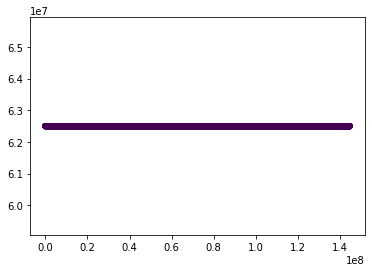

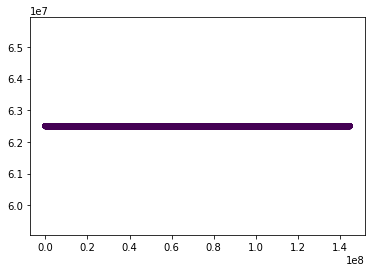

In [ ]:
import segyio
import numpy as np
from shutil import copyfile
from matplotlib import pyplot as plt

filename = 'SEAM_2d_DIP_XX_off_3000_Local_sin_off0.segy'
#filename = 'Modelo_Velocidad_1.segy'
with segyio.open(filename,ignore_geometry=True) as segyfile:

    # Memory map file for faster reading (especially if file is big...)
    segyfile.mmap()

    # Extract header word for all traces
    sourceX = segyfile.attributes(segyio.TraceField.SourceX)[:]

    # Scatter plot sources and receivers color-coded on their number
    plt.figure()
    sourceY = segyfile.attributes(segyio.TraceField.SourceY)[:]
    nsum = segyfile.attributes(segyio.TraceField.NSummedTraces)[:]
    plt.scatter(sourceX, sourceY, c=nsum, edgecolor='none')

    groupX = segyfile.attributes(segyio.TraceField.GroupX)[:]
    groupY = segyfile.attributes(segyio.TraceField.GroupY)[:]
    nstack = segyfile.attributes(segyio.TraceField.NStackedTraces)[:]
    plt.figure()
    plt.scatter(groupX, groupY, c=nstack, edgecolor='none')


[0.         0.         0.         ... 0.00016152 0.00016548 0.        ]
[0.000000e+00 2.463169e-04 0.000000e+00 ... 2.123621e-04 9.922730e-05
 0.000000e+00]
Trace(traces = 27760, samples = 1251)
Trace(traces = 27760, samples = 1251)

Se mostraran cabeceros a continuación con .items: 

ItemsView({TRACE_SEQUENCE_LINE: 37, TRACE_SEQUENCE_FILE: 6, FieldRecord: 1, TraceNumber: 37, EnergySourcePoint: 1, CDP: 37, CDP_TRACE: 0, TraceIdentificationCode: 1, NSummedTraces: 0, NStackedTraces: 0, DataUse: 0, offset: 225, ReceiverGroupElevation: -15039700, SourceSurfaceElevation: -14904001, SourceDepth: 0, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 0, GroupWaterDepth: 0, ElevationScalar: -10000, SourceGroupScalar: -10000, SourceX: 0, SourceY: 62500000, GroupX: 2250000, GroupY: 62500000, CoordinateUnits: 3, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, Lag

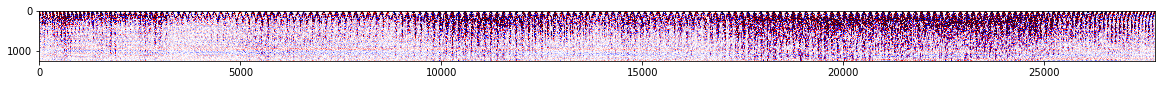

In [ ]:
import segyio
import numpy as np
from shutil import copyfile
from matplotlib import pyplot as plt

segyfile = 'SEAM_2d_DIP_XX_off_3000_Local_sin_off0.segy'
#filename = 'Modelo_Velocidad_1.segy'
#with segyio.open(filename,ignore_geometry=True) as segyfile:
f = segyio.open(segyfile, strict=False)

    # Memory map file for faster reading (especially if file is big...)
    # segyfile.mmap()

clip = 1e-4
vmin, vmax = -clip, clip

# Figure
figsize=(20, 20)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k', squeeze=False, sharex=True)
axs = axs.ravel()
im = axs[0].imshow(f.trace.raw[:].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)
print(f.trace[1][:])
print(f.trace[1-2][:])
print(f.trace.raw)
print(f.trace)
#im = axs[0].imshow(f.trace[:][:] , cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)

#CABECEROS
print('\nSe mostraran cabeceros a continuación con .items: \n')
print(f.header[5].items()) #se debe especificar algún cabecero
print('\nSe mostraran cabeceros a continuación SIN .items: \n')
print(f.header[10])
print('PRUEBA DE HEADER',f.header[5][5])

#LINE
print('\nSe mostraran funcion ILINE: \n')
#print(f.line[1]) #como se tiene struct=false no se pueden usar iline, xline u otras modos que dependan de la geometría

f.close()



In [ ]:
help(segyio.open)

Help on function open in module segyio.open:

open(filename, mode='r', iline=189, xline=193, strict=True, ignore_geometry=False, endian='big')
    Open a segy file.
    
    Opens a segy file and tries to figure out its sorting, inline numbers,
    crossline numbers, and offsets, and enables reading and writing to this
    file in a simple manner.
    
    For reading, the access mode `r` is preferred. All write operations will
    raise an exception. For writing, the mode `r+` is preferred (as `rw` would
    truncate the file). Any mode with `w` will raise an error. The modes used
    are standard C file modes; please refer to that documentation for a
    complete reference.
    
    Open should be used together with python's ``with`` statement. Please refer
    to the examples. When the ``with`` statement is used the file will
    automatically be closed when the routine completes or an exception is
    raised.
    
    By default, segyio tries to open in ``strict`` mode. This means 

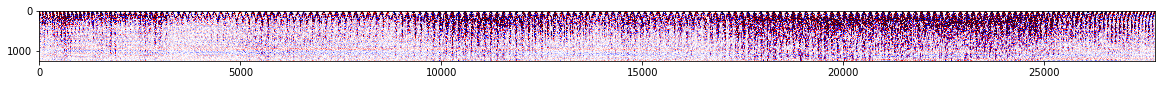

In [ ]:
import segyio
import numpy as np
from shutil import copyfile
from matplotlib import pyplot as plt

segxx = 'SEAM_2d_DIP_XX_off_3000_Local_sin_off0.segy'

with segyio.open(segxx,strict=False) as f:
  clip = 1e-4
  vmin, vmax = -clip, clip
  # Figure
  figsize=(20, 20)
  fig, axs = plt.subplots(nrows=1, ncols=1, figsize=figsize, facecolor='w', edgecolor='k', squeeze=False, sharex=True)
  axs = axs.ravel()
  im = axs[0].imshow(f.trace.raw[:].T, cmap=plt.cm.seismic, vmin=vmin, vmax=vmax)
  f.trace